In [68]:
import re
import requests
import seaborn as sns
import pandas as pd

# 1

### Извлекаем из файла ftp ссылки и записываем их в файл ftps

In [112]:
response = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references")
data = response.text

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Serfentum/bf_course/master/15.re/references (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x127bcd390>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [113]:
pattern = r"ftp\.[^;\s]*"
string = data

result = re.findall(pattern, string)
result = list(sorted(set(result)))
for i in result:
    print(i)

ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124634.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124635.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124636.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124637.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124638.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124639.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124640.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124641.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124642.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124643.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124644.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124645.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124646.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124647.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124648.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124649.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124650.md5
ftp.sra.ebi.ac.uk/vol1/ERA127/ERA127544/ERR124651.md5
ftp.sra.ebi.ac.uk/vol1/ERA12

In [114]:
with open("ftps", "w") as ftp_file:
    for line in result:
        ftp_file.write(f"{line}\n")

# 2

### Извлекаем из рассказа все числа

In [6]:
story_link = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD")
story = story_link.text

In [7]:
print(story[:2000])

 2430 A.D.

Between midnight and dawn, when sleep will not come and all the old wounds begin to ache, I often have a nightmare vision of a future world in which there are billions of people, all numbered and registered, with not a gleam of genius anywhere, not an original mind, a rich personality, on the whole packed globe.

-J.B. Priestly.

"He'll talk to us," said Alvarez when the other stepped out the door.

"Good," said Bunting. "Social pressure is bound to get to him eventually. An odd character. How he escaped genetic adjustment I'll never know. -But you do the talking. He irritates me past tact."

Together they swung down the corridor along the Executive Trail, which was, as always, sparsely occupied. They might have taken the Moving Strips, but there were only two miles to go and Alvarez enjoyed walking, so I Bunting didn't insist. I

Alvarez was tall and rather thin, with the kind of athletic figure one would expect of a person who cherished the muscular activities; who routin

In [8]:
pattern = r"\d+\.*\d+"
string = story

result_story = re.findall(pattern, string)

In [9]:
print(result_story)

['2430', '1969', '2430', '2430', '57', '57', '1970', '3.68', '35', '460', '2430']


# 3

### Извлекаем из рассказа все слова, где есть буква "а" (регистр не важен)

In [10]:
pattern = r"\w*[aA]\w*"
string = story

result_story_a = re.findall(pattern, string)

In [11]:
print(result_story_a)

['A', 'and', 'dawn', 'and', 'all', 'ache', 'have', 'a', 'nightmare', 'a', 'are', 'all', 'and', 'a', 'gleam', 'anywhere', 'an', 'original', 'a', 'personality', 'packed', 'talk', 'said', 'Alvarez', 'said', 'Social', 'eventually', 'An', 'character', 'escaped', 'adjustment', 'talking', 'irritates', 'past', 'tact', 'along', 'Trail', 'was', 'as', 'always', 'sparsely', 'have', 'taken', 'and', 'Alvarez', 'walking', 'Alvarez', 'was', 'tall', 'and', 'rather', 'athletic', 'a', 'muscular', 'activities', 'stairs', 'and', 'rampways', 'instance', 'almost', 'an', 'character', 'and', 'avoided', 'sunlamps', 'and', 'was', 'pale', 'said', 'want', 'can', 'have', 'square', 'space', 'and', 'has', 'apartment', 'Rather', 'a', 'a', 'way', 'said', 'Alvarez', 'And', 'a', 'Alvarez', 'added', 'matter', 'reach', 'peak', 'reach', 'reach', 'goal', 'All', 'mankind', 'And', 'said', 'at', 'that', 'way', 'that', 'against', 'plastic', 'passed', 'and', 'saw', 'distance', 'was', 'a', 'plankton', 'varieties', 'almost', 'that'

# 4

### Извлекаем из рассказа восклицательные предложения

In [44]:
pattern = r"[^.\"]*!"
string = story

result_story_exc = re.findall(pattern, string)

In [45]:
print(result_story_exc)

['Yes!', 'Literally!', ' There was once a time! Centuries ago!', 'Think, Cranwitz!', 'If we succeed!']


# 5

In [168]:
pattern = r"\w+'\w+|\w+"
string = story

result_story_hist = re.findall(pattern, string)
print(result_story_hist)

['2430', 'A', 'D', 'Between', 'midnight', 'and', 'dawn', 'when', 'sleep', 'will', 'not', 'come', 'and', 'all', 'the', 'old', 'wounds', 'begin', 'to', 'ache', 'I', 'often', 'have', 'a', 'nightmare', 'vision', 'of', 'a', 'future', 'world', 'in', 'which', 'there', 'are', 'billions', 'of', 'people', 'all', 'numbered', 'and', 'registered', 'with', 'not', 'a', 'gleam', 'of', 'genius', 'anywhere', 'not', 'an', 'original', 'mind', 'a', 'rich', 'personality', 'on', 'the', 'whole', 'packed', 'globe', 'J', 'B', 'Priestly', "He'll", 'talk', 'to', 'us', 'said', 'Alvarez', 'when', 'the', 'other', 'stepped', 'out', 'the', 'door', 'Good', 'said', 'Bunting', 'Social', 'pressure', 'is', 'bound', 'to', 'get', 'to', 'him', 'eventually', 'An', 'odd', 'character', 'How', 'he', 'escaped', 'genetic', 'adjustment', "I'll", 'never', 'know', 'But', 'you', 'do', 'the', 'talking', 'He', 'irritates', 'me', 'past', 'tact', 'Together', 'they', 'swung', 'down', 'the', 'corridor', 'along', 'the', 'Executive', 'Trail', 

### Отбираем только уникальные слова и числа

In [169]:
new_result = []
for i in result_story_hist:
    i = i.lower()
    new_result.append(i)
new_result = set(new_result)

### Делаем массив с длинами уникальных слов

In [171]:
len_result = []
for i in new_result:
    len_i = len(i)
    len_result.append(len_i)

In [173]:
print(new_result)

{'steady', 'asked', 'men', 'york', 'activities', "i've", 'newton', 'giant', 'is', 'calories', 'evolution', 'eyes', 'regulated', 'future', 'everything', 'word', 'two', 'prolific', 'dreamed', 'odd', 'twentieth', 'placid', "we've", 'sullen', 'up', 'show', 'really', 'species', 'dry', 'ground', 'blade', 'the', 'zoo', 'millions', 'uniformity', 'necessity', 'after', 'someday', 'end', 'heat', 'many', 'unallayed', 'books', 'having', 'either', 'should', 'energy', 'death', 'cold', 'pure', 'advance', 'hold', 'combination', 'brightened', 'madness', 'else', "other's", 'scientific', 'dried', 'system', 'humanity', 'peacefully', 'numbered', 'quite', 'shall', 'wants', 'world', 'billion', 'science', 'd', 'that', 'talked', 'birds', 'left', "there's", '35', 'stand', 'idea', 'longer', 'variety', 'passed', 'tell', 'talk', 'wore', "they're", 'measure', "they'll", 'time', 'force', 'sunlamps', 'population', 'clear', 'evaluate', 'does', 'maintained', 'something', 'animals', 'engineering', 'escaped', 'cells', 'su

In [174]:
print(len_result)

[6, 5, 3, 4, 10, 4, 6, 5, 2, 8, 9, 4, 9, 6, 10, 4, 3, 8, 7, 3, 9, 6, 5, 6, 2, 4, 6, 7, 3, 6, 5, 3, 3, 8, 10, 9, 5, 7, 3, 4, 4, 9, 5, 6, 6, 6, 6, 5, 4, 4, 7, 4, 11, 10, 7, 4, 7, 10, 5, 6, 8, 10, 8, 5, 5, 5, 5, 7, 7, 1, 4, 6, 5, 4, 7, 2, 5, 4, 6, 7, 6, 4, 4, 4, 7, 7, 7, 4, 5, 8, 10, 5, 8, 4, 10, 9, 7, 11, 7, 5, 10, 9, 8, 11, 7, 5, 5, 6, 6, 7, 9, 9, 5, 5, 4, 7, 7, 9, 4, 7, 6, 7, 5, 10, 8, 1, 4, 4, 7, 6, 5, 3, 8, 3, 7, 4, 7, 4, 7, 7, 6, 9, 5, 8, 5, 9, 4, 4, 6, 6, 4, 6, 4, 4, 7, 6, 6, 5, 8, 6, 6, 9, 3, 5, 5, 5, 8, 4, 3, 5, 7, 8, 4, 2, 4, 5, 7, 5, 6, 4, 8, 10, 8, 9, 5, 6, 8, 6, 5, 6, 7, 6, 11, 5, 3, 7, 5, 4, 4, 3, 11, 3, 8, 7, 7, 6, 6, 6, 8, 8, 7, 4, 4, 5, 4, 2, 15, 12, 7, 6, 2, 8, 9, 3, 4, 9, 11, 5, 4, 4, 2, 5, 3, 4, 2, 5, 7, 3, 10, 8, 6, 6, 5, 3, 8, 6, 10, 4, 8, 13, 6, 9, 8, 6, 4, 7, 2, 7, 8, 4, 8, 5, 7, 11, 6, 5, 2, 4, 7, 10, 8, 7, 5, 6, 5, 2, 5, 7, 9, 4, 3, 4, 4, 7, 9, 6, 5, 2, 6, 5, 7, 6, 7, 6, 2, 4, 9, 6, 4, 4, 4, 4, 8, 5, 9, 4, 2, 9, 3, 4, 3, 6, 11, 3, 5, 9, 9, 3, 4, 4, 8, 3, 8, 3, 5,

In [175]:
set_len = set(len_result)
list_len = []
for i in set_len:
    cnt = len_result.count(i)
    list_len.append(cnt)


In [176]:
sum_len = sum(list_len)
part_list = []

for i in list_len:
    part = i/sum_len
    part = round(part, 3)
    part_list.append(part)


### Создаем датафрейм с длинами слов, их количеством и долей

In [177]:
len_df = pd.DataFrame(list(zip(list(set_len), list_len, part_list)), columns = ['Word length', 'Values', 'Part'])
len_df

,Word length,Values,Part
0,1,6,0.006
1,2,27,0.029
2,3,74,0.079
3,4,166,0.177
4,5,146,0.155
5,6,143,0.152
6,7,135,0.144
7,8,102,0.109
8,9,66,0.070
9,10,36,0.038


### Строим barplot 

<AxesSubplot: xlabel='Word length', ylabel='Part'>

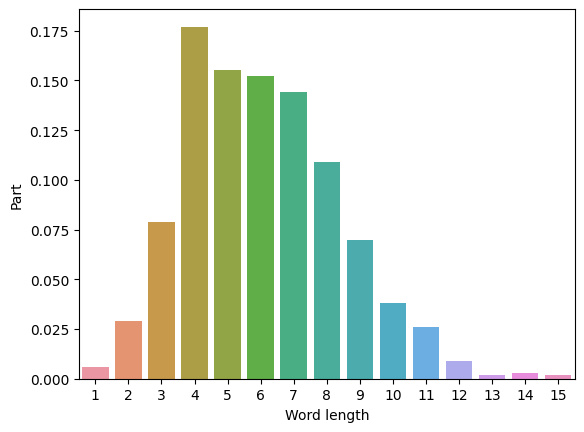

In [178]:
sns.barplot(data = len_df, x = 'Word length', y = 'Part')

# 6

### Функция для перевода с русского языка на "кирпичный" язык

In [143]:
def rus_to_brick(string):
    
    # Отбираем слова из текста
    pattern_1 = r"\w+"
    string_1 = 'Введите строку на русском языке для перевода'
    result_translate = re.findall(pattern_1, string_1)
    
    # Функция для наждения значения по ключу (значение match_obj) в объявленном словаре
    def my_match(match_obj):
        dict_translate = {
        'а':'КА',
        'у':'КУ',
        'о':'КО',
        'е':'КЕ',
        'и':'КИ',
        'я':'КЯ',
        'ю':'КЮ',
        'ё':'КЁ',
        'э':'КЭ',
        'ы':'КЫ',
        }
        return match_obj.group(0) + dict_translate.get(match_obj.group(0), "")
    
    # Отбираем гласные буквы в словах и ставим после них значения словаря по ключу
    pattern_2 = r"([ауоеияюёэы])"
    result_vowel = []

    for s in result_translate:
        vowel = re.sub(pattern_2, my_match, s)
        result_vowel.append(vowel)
    
    # Записываем результат в строку
    string_result = ''
    for w in result_vowel:
        string_result += w
        string_result += ' '
        
    return string_result

# 7

### Находим в тексте предложения с заданным количеством слов

In [243]:
def extract_n_words(string, count):
    
    pattern = r"[^.]*."
    string = string
    result_1 = re.findall(pattern, string)

    result = ()
    pattern_2 = r"\w+"
    for res in result_1:
        result_2 = re.findall(pattern_2, res)
        if len(result_2) == n:
            result = result + (result_2,)

    return result